In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

print('data shape:{0};no.positive:{1};no.negetive:{2}'.format(X.shape,Y[Y==1].shape[0],Y[Y==0].shape[0]))
print(cancer.data[1])

data shape:(569, 30);no.positive:357;no.negetive:212
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


In [2]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [4]:
from sklearn.linear_model import LogisticRegression,LinearRegression

import time

start = time.perf_counter()
model_logist = LogisticRegression()
model_linear = LinearRegression()
model_logist.fit(X_train,Y_train)
model_linear.fit(X_train,Y_train)

train_score = model_logist.score(X_train,Y_train)
cv_score = model_logist.score(X_test,Y_test)
print('logistic,train_score:{0:.6f};cv_score:{1:.6f},time_cost:{2:.6f}'.format(train_score,cv_score,time.perf_counter()-start))
train_score = model_linear.score(X_train,Y_train)
cv_score = model_linear.score(X_test,Y_test)
print('linear,train_score:{0:.6f};cv_score:{1:.6f},time_cost:{2:.6f}'.format(train_score,cv_score,time.perf_counter()-start))


logistic,train_score:0.956044;cv_score:0.947368,time_cost:0.047983
linear,train_score:0.771301;cv_score:0.769009,time_cost:0.048593


In [5]:
import numpy as np

y_pred = model_logist.predict(X_test)
print('matchs:{0}/{1}'.format(np.equal(y_pred,Y_test).shape[0],Y_test.shape[0]))

matchs:114/114


In [8]:
y_pred_proba = model_logist.predict_proba(X_test)
print('sample of predict probability:{0}'.format(y_pred_proba[0]))
y_pred_proba_0 = y_pred_proba[:,0]>0.1
print(y_pred_proba_0)
result = y_pred_proba[y_pred_proba_0]
y_pred_proba_1 = result[:,1]>0.1
print(result[y_pred_proba_1])

sample of predict probability:[0.05309796 0.94690204]
[False  True False  True  True  True  True False False False False False
 False  True  True False  True  True  True  True False  True  True False
 False  True False  True False False False  True  True  True False False
  True False  True False False  True  True  True  True  True  True False
  True False False False False False False False False  True  True  True
  True  True False  True  True False False False False  True False  True
 False False  True  True  True False False  True False  True False False
 False  True False  True  True  True False  True False  True False  True
 False False False  True  True  True  True  True False False False  True
  True  True False False  True False]
[[0.35131157 0.64868843]
 [0.32838304 0.67161696]
 [0.7988248  0.2011752 ]
 [0.12341313 0.87658687]
 [0.15251656 0.84748344]
 [0.1231029  0.8768971 ]
 [0.73169445 0.26830555]
 [0.64107101 0.35892899]
 [0.10048606 0.89951394]
 [0.3191928  0.6808072 ]
 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import time

def polynoimial(degree = 1,**kwarg):
    poly_feature = PolynomialFeatures(degree = degree,include_bias=False)
    logistic = LogisticRegression(**kwarg)
    pipeline = Pipeline([('PolynomialFeature',poly_feature),('logistic_feature',logistic)])
    return pipeline

model = polynoimial(degree = 2,penalty = 'l1')
start = time.perf_counter()
model.fit(X_train,Y_train)
train_score = model.score(X_train,Y_train)
cv_score = model.score(X_test,Y_test)
print('elaspe:{0:.6f};train_score:{1:.6f};test_score:{2:.6f}'.format(time.perf_counter()-start,train_score,cv_score))

logistic_regresssion = model.name_steps['']

elaspe:0.118807;train_score:0.997802;test_score:0.982456


In [22]:
logistic_regression = model.named_steps['logistic_feature']
print('model parameters shape:{0}; count of non-zero element:{1}'.format(logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))

model parameters shape:(1, 495); count of non-zero element:107


elaspe:13.148406


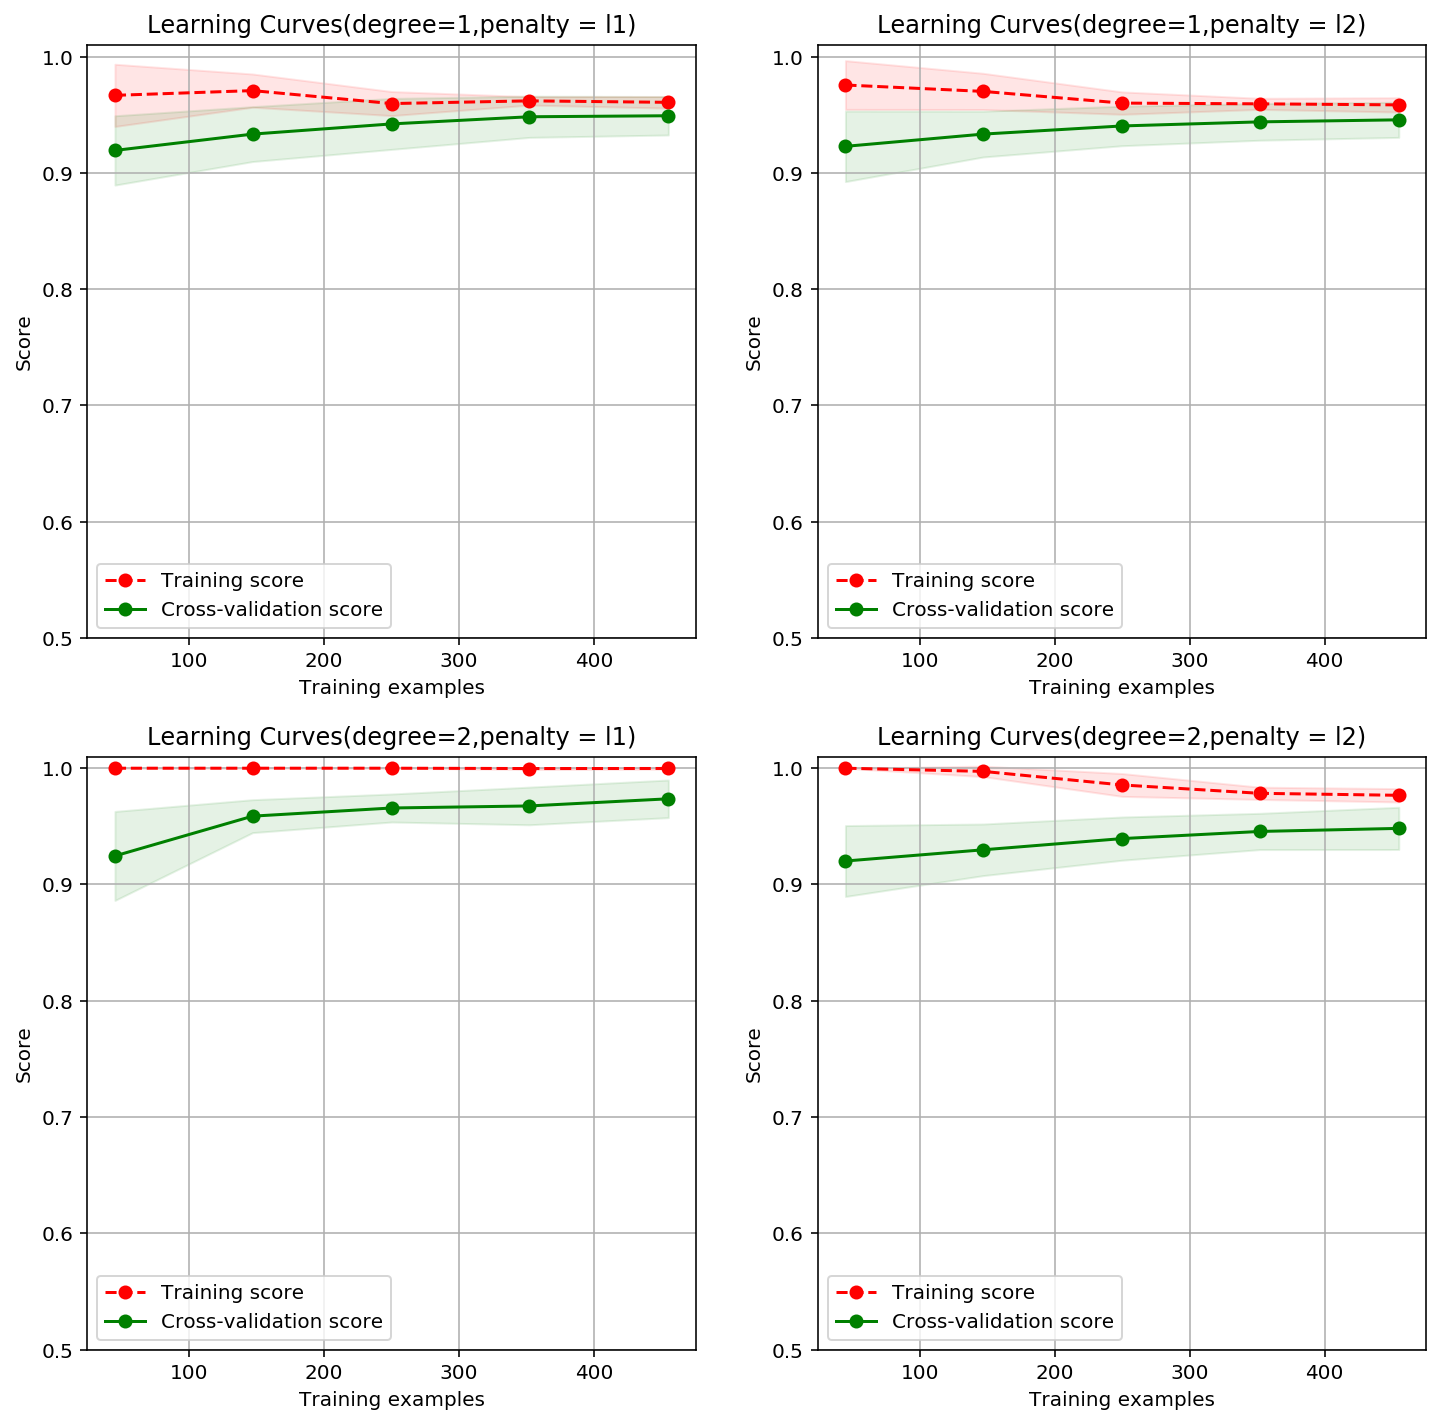

In [39]:
from utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt


cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state = 0)
degree = [1,2]
title = 'Learning Curves(degree={0},penalty = {1})'
penalty = ['l1','l2']
start = time.perf_counter()
plt.figure(figsize = (12,12),dpi = 144)
for i in range(len(degree)):
    for j in range(len(penalty)):
        plt.subplot(2,2,i*2+j+1)
        plot_learning_curve(plt,polynoimial(degree = degree[i],penalty = penalty[j]),title.format(degree[i],penalty[j]),X,Y,ylim=(0.5,1.01),cv = cv)
 
print('elaspe:{0:.6f}'.format(time.perf_counter()-start))    
    
    
    
    
    
    
    
    